# Quick Review: KNN Classification

KNN Classification in sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## KNN Classification

How does it work? 

Algorithm Pseudocode:
- Step 1: choose the number of k (neighbors) and a distance metric.
- Step 2: Find the k-nearest neighbors of the record we want to classify.
- Step 3: Assign the class label by majority vote.

It's a very different and simple algorithm compared to the ones we will see in this course.
Lazy learner: it doesn't learn any discriminative function from the training data, but memorizes the data instead.


Advantages:
 * adapts easily to new data.
 
 
Disadvantages:
* we cannot discard training examples because no training is involved.
* storage space can become a challenge with large datasets.
* computationally complexity grows linearly with the size of the data.


### Load the data
Load the data from the Iris dataset in Assignment 1. Create your X features and your Y labels.


In [43]:
from sklearn.datasets import load_iris

iris= load_iris()

In [44]:
# Store features matrix in X
X= pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 
                                    'petal_length', 'petal_width'])
#Store target vector in Y
Y= iris.target

### Train/Test Split the Data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

### Fit KNN Model

In [47]:
# first we need to instantiate the model instance
neigh = KNeighborsClassifier(n_neighbors=3)
# then we can fit the model with our training data
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Predict with KNN Model

In [38]:
y_pred = neigh.predict(X_test)
y_pred

/Users/emilykenney/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

### Score with KNN Model

In [48]:
accuracy_score(y_test, y_pred)

0.9555555555555556

In [49]:
confusion_matrix(y_test, y_pred)

array([[18,  0,  0],
       [ 0,  9,  1],
       [ 0,  1, 16]])

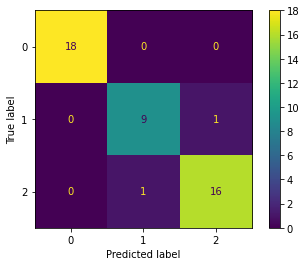

In [50]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### (optional) Exercise - Build and test a Nearest Neighbors classifier

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

In this exercise we'll use the Iris dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). The data include 50 observations of each of 3 types of irises (150 total). Each observation includes 4 measurements: sepal and petal width and height. The goal is to predict the iris type from these measurements.

In [2]:
# Load the data from sklearn
iris = load_iris()
print ('Iris target names:', iris.target_names)
print ('Iris feature names:', iris.feature_names)
X, Y = iris.data, iris.target

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Split into train and test.
train_data, train_labels = X[:100], Y[:100]
test_data, test_labels = X[100:], Y[100:]

Iris target names: ['setosa' 'versicolor' 'virginica']
Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
train_data

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [4.9, 3.6, 1.4, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2

We can use the Euclidean distance (implementd in the function below) for our KNN classifier. The function returns the Euclidean distance between 2 vectors, v1 and v2.

In [7]:
def EuclideanDistance(v1, v2):
    sum = 0.0
    for index in range(len(v1)):
        sum += (v1[index] - v2[index]) ** 2
    return sum ** 0.5

**Question 1**. Let's compute all the pairwise distances in the training data and plot a histogram. How would you interpret the result?

In [4]:
# TODO code below


**Question 2**. Let's create a class that implements a Nearest Neighbors classifier. We'll model it after the sklearn classifier implementations, with fit() and predict() methods.

<http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier>

Implement the fit() and _predict_item() functions.

In [18]:
class NearestNeighbors:
    # Initialize an instance of the class.
    def __init__(self, metric=EuclideanDistance):
        self.metric = metric

    # TODO: KNN training
    def fit(self, train_data, train_labels):
        """
        code here
        """

    # Make predictions for each test example and return results.
    def predict(self, test_data):
        results = []
        for item in test_data:
            results.append(self._predict_item(item))
        return results

    # TODO: Private function for making a single prediction.
    def _predict_item(self, item, k=1):
        best_dist, best_label = 1.0e10, None
        """
        code here
        """

        return best_label

**Question 3**. Run an experiment with the classifier. Comment on the performance.

In [19]:
clf = NearestNeighbors()
clf.fit(train_data, train_labels)
preds = clf.predict(test_data)

correct, total = 0, 0
for pred, label in zip(preds, test_labels):
    if pred == label: correct += 1
    total += 1
print ('total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total))

total:  50  correct:   0  accuracy: 0.00
